In [1]:
import numpy as np
import matplotlib.pyplot as plt

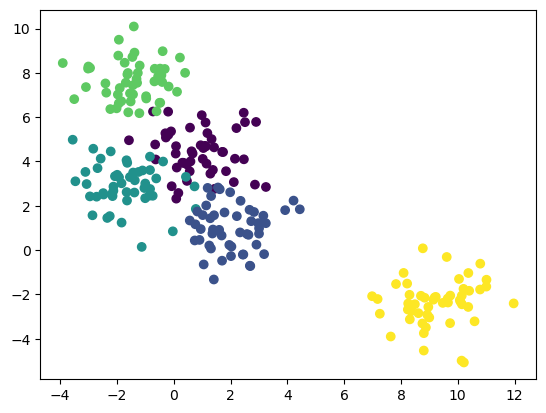

In [2]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=250,centers=5,n_features=2,random_state=0)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

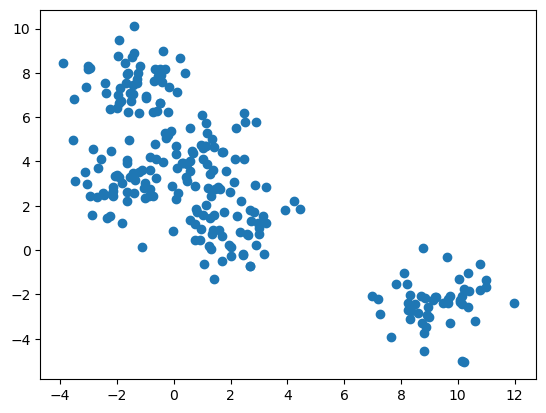

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

# Kmeans聚类法

In [6]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=0).fit(X)#n_clusters聚类类别数

In [7]:
kmeans.labels_

array([3, 3, 0, 1, 4, 0, 1, 0, 2, 4, 3, 0, 2, 4, 1, 4, 4, 3, 4, 0, 0, 3,
       3, 1, 1, 1, 0, 2, 3, 1, 0, 0, 4, 2, 3, 4, 4, 3, 4, 4, 3, 2, 1, 0,
       0, 2, 2, 4, 0, 1, 0, 1, 1, 1, 2, 4, 2, 3, 0, 0, 0, 2, 4, 2, 2, 0,
       3, 2, 3, 0, 0, 4, 3, 4, 1, 0, 4, 1, 1, 3, 1, 3, 0, 2, 4, 0, 2, 3,
       4, 2, 0, 2, 1, 0, 3, 1, 2, 4, 0, 4, 3, 2, 4, 0, 2, 2, 0, 3, 2, 0,
       0, 2, 2, 1, 2, 1, 0, 4, 2, 3, 3, 0, 4, 3, 2, 2, 3, 4, 4, 2, 3, 3,
       0, 4, 4, 3, 0, 1, 2, 2, 4, 0, 4, 1, 4, 2, 4, 0, 3, 0, 1, 0, 3, 2,
       1, 2, 2, 1, 2, 4, 4, 1, 1, 0, 1, 3, 0, 1, 4, 2, 2, 3, 4, 4, 0, 3,
       3, 1, 3, 4, 1, 2, 1, 1, 0, 3, 2, 1, 4, 1, 1, 4, 2, 3, 3, 4, 1, 4,
       1, 2, 3, 4, 1, 1, 1, 3, 2, 4, 0, 3, 2, 2, 4, 3, 2, 3, 3, 0, 2, 3,
       2, 4, 0, 1, 2, 2, 0, 0, 4, 4, 0, 4, 4, 1, 0, 1, 1, 3, 3, 1, 4, 1,
       3, 1, 3, 2, 3, 2, 1, 1])

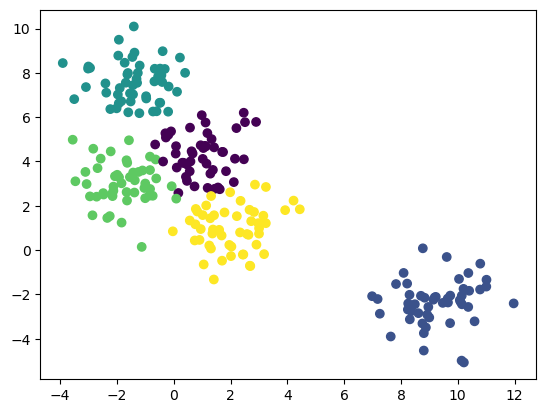

In [8]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.show()

In [9]:
center=kmeans.cluster_centers_
center

array([[ 0.98590094,  4.30636424],
       [ 9.27996402, -2.3764533 ],
       [-1.39550161,  7.57857088],
       [-1.7908866 ,  3.0008386 ],
       [ 2.05849588,  0.9767519 ]])

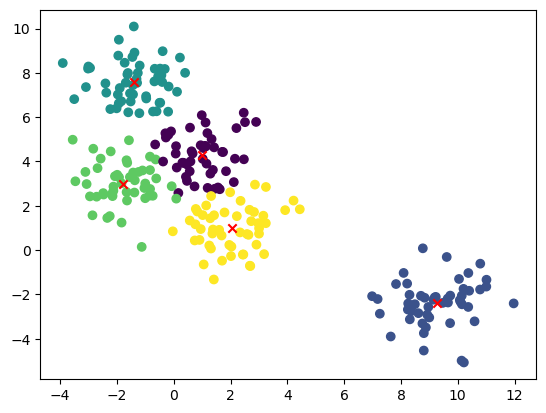

In [10]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
center=kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1],marker='x',c='r')
plt.show()

## 不知道簇的个数的情况下

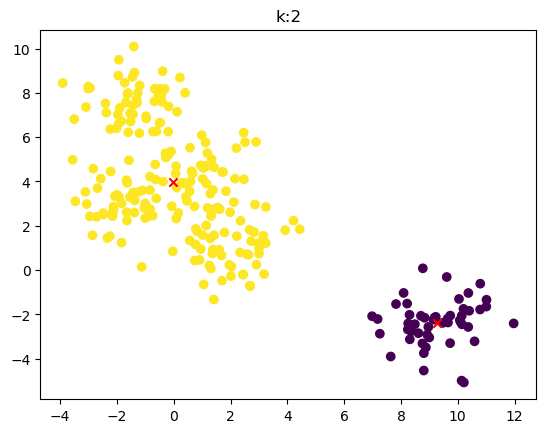

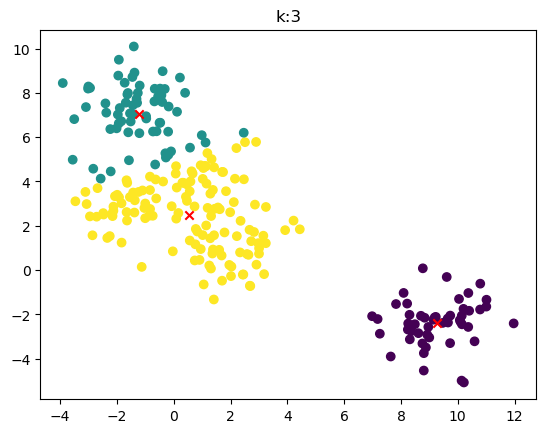

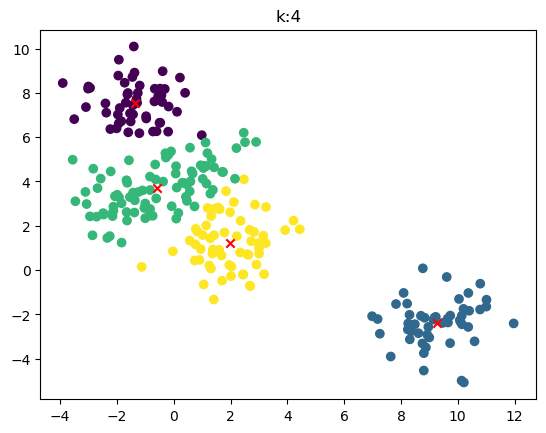

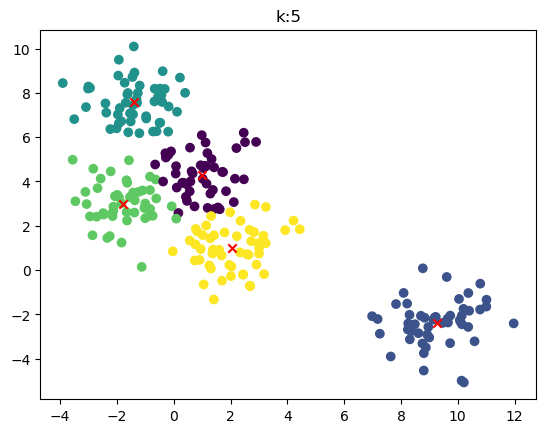

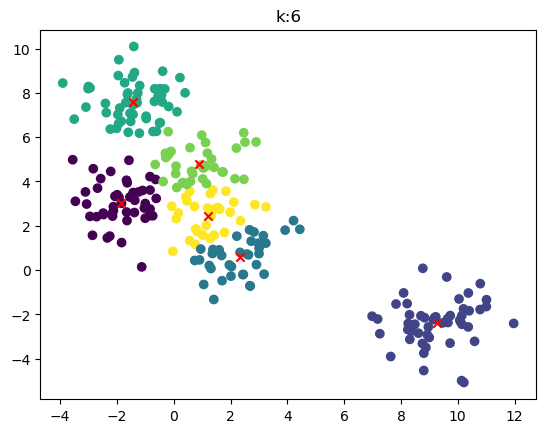

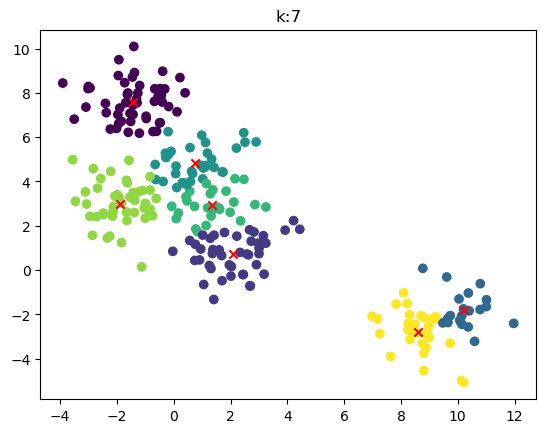

In [13]:
for n_clusters in[2,3,4,5,6,7]:
        clusterer=KMeans(n_clusters=n_clusters,random_state=0).fit(X)
        z=clusterer.labels_
        center=clusterer.cluster_centers_
        plt.scatter(X[:,0],X[:,1],c=z)
        plt.scatter(center[:,0],center[:,1],marker='x',c='r')
        plt.title("k:{0}".format(n_clusters))
        plt.show()

# 层次聚类

In [21]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(linkage='ward',n_clusters=5).fit(X)#linkage四种方法

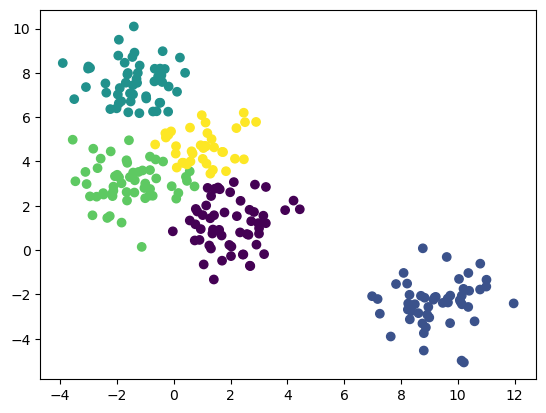

In [22]:
plt.scatter(X[:,0],X[:,1],c=agg.labels_)
plt.show()

## 对簇的个数没有预期时传入距离阈值distance_threshold避免一个个试

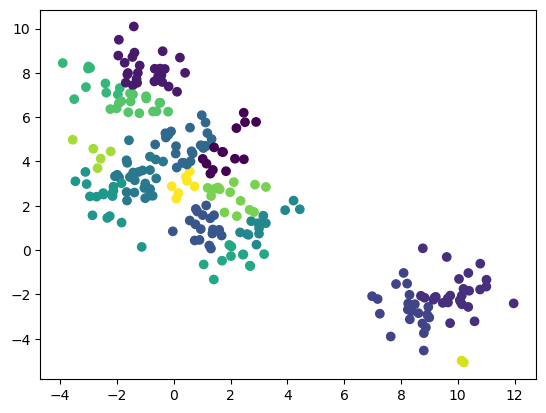

In [23]:
agg=AgglomerativeClustering(distance_threshold=5,n_clusters=None).fit(X)
plt.scatter(X[:,0],X[:,1],c=agg.labels_)
plt.show()

### 作出层次图

In [24]:
from scipy.cluster.hierarchy import linkage,dendrogram
def show_dendrogram(model):
    counts=np.zeros(model.children_.shape[0])
    n_samples=len(model.labels_)
    for i,merge in enumerate(model.children_):
        current_count=0
        for child_idx in merge:
            if child_idx<n_samples:
                current_count+=1#leaf node
            else:
                current_count+=counts[child_idx-n_samples]
        counts[i]+=current_count
    
    linkage_matrix=np.column_stack(
        [model.children_,model.distances_,counts]
    ).astype(float)
    dendrogram(linkage_matrix)

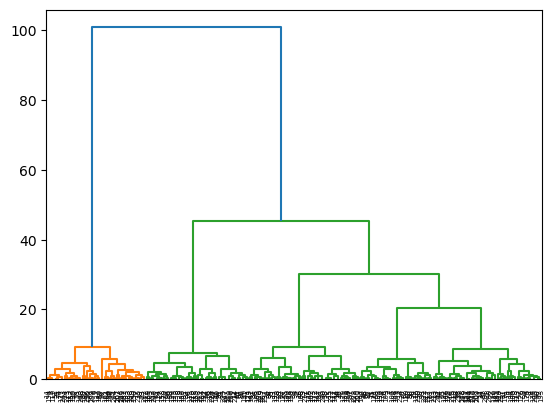

In [25]:
show_dendrogram(agg)